## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 10 #

La struttura dell'algoritmo genetico utilizzato per la seguente esercitazione è analogo a quello sviluppato per la esercitazione 9, vedere il notebook relativo a quella esercitazione per maggiori dettagli.

### esercizio 10.1

In questo esercizio è stato parallelizzato il GA dell'esercitaizone precedente grazie alle librerie MPI, con le quali è stato implementato un codice che desse la possibilità a ogni nodo di operare isolatamente con il proprio GA, e poi ogni Nmigr generazioni (in questo caso Nmigr=10) a due a due i processi si scambiavano i migliori individui della popolazione.

### esercizio 10.2

E' stato applicato il codice dell'esercizio precedente per studiare il problema TSP per 50 capitali americane. Sono stati studiati i seguenti casi:
* un solo processo;
* 10 processi indipendenti;
* 10 processi comunicanti fra loro come descritto nel 10.1

Di seguito vengono riportati i risultati ottenuti

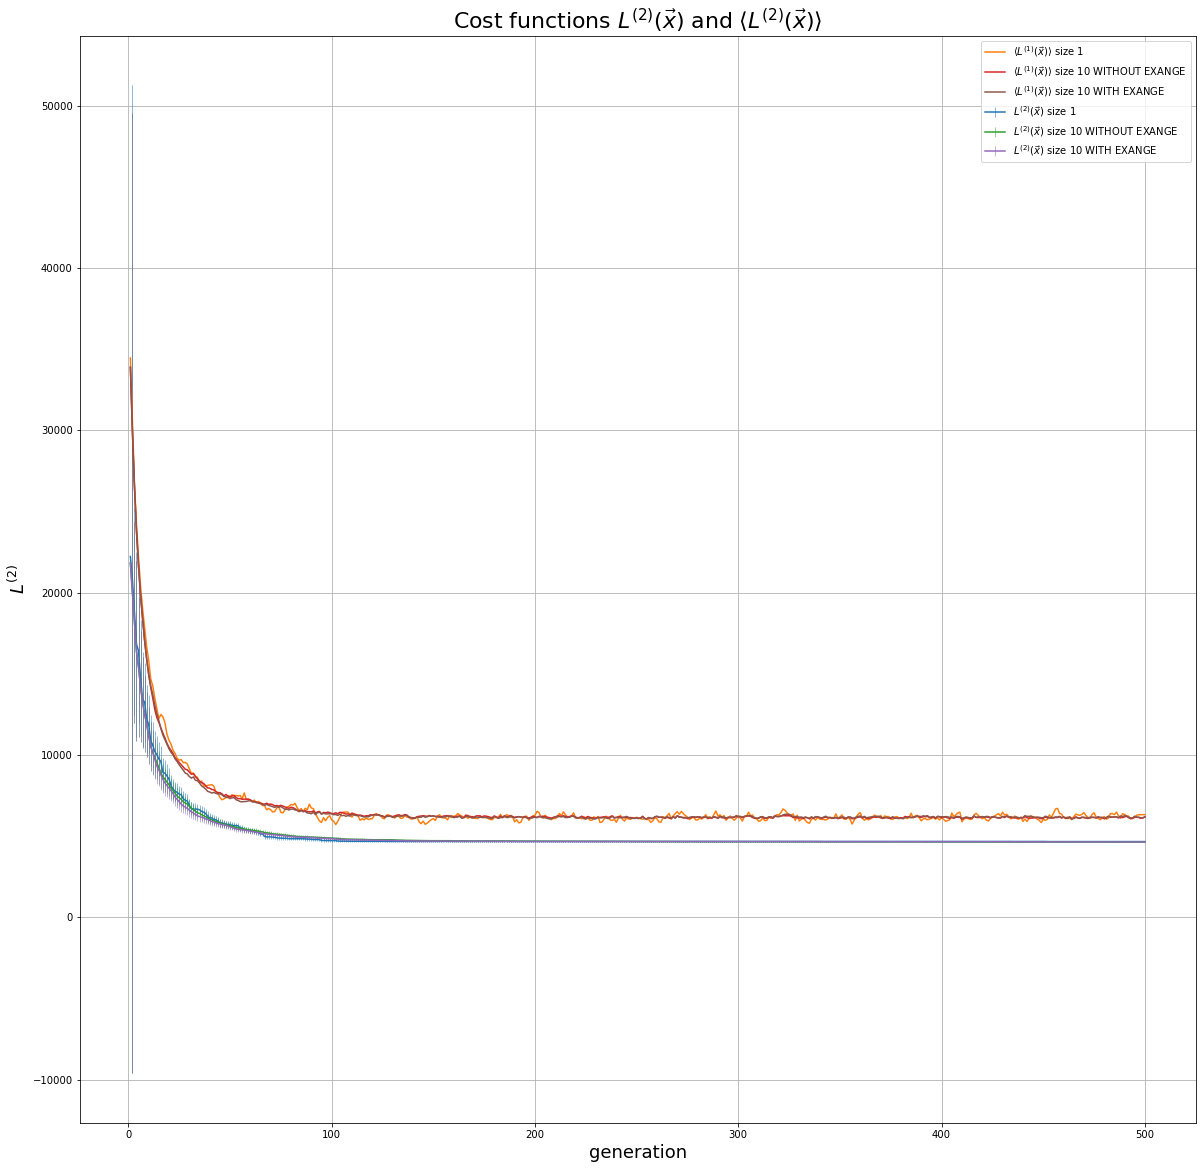

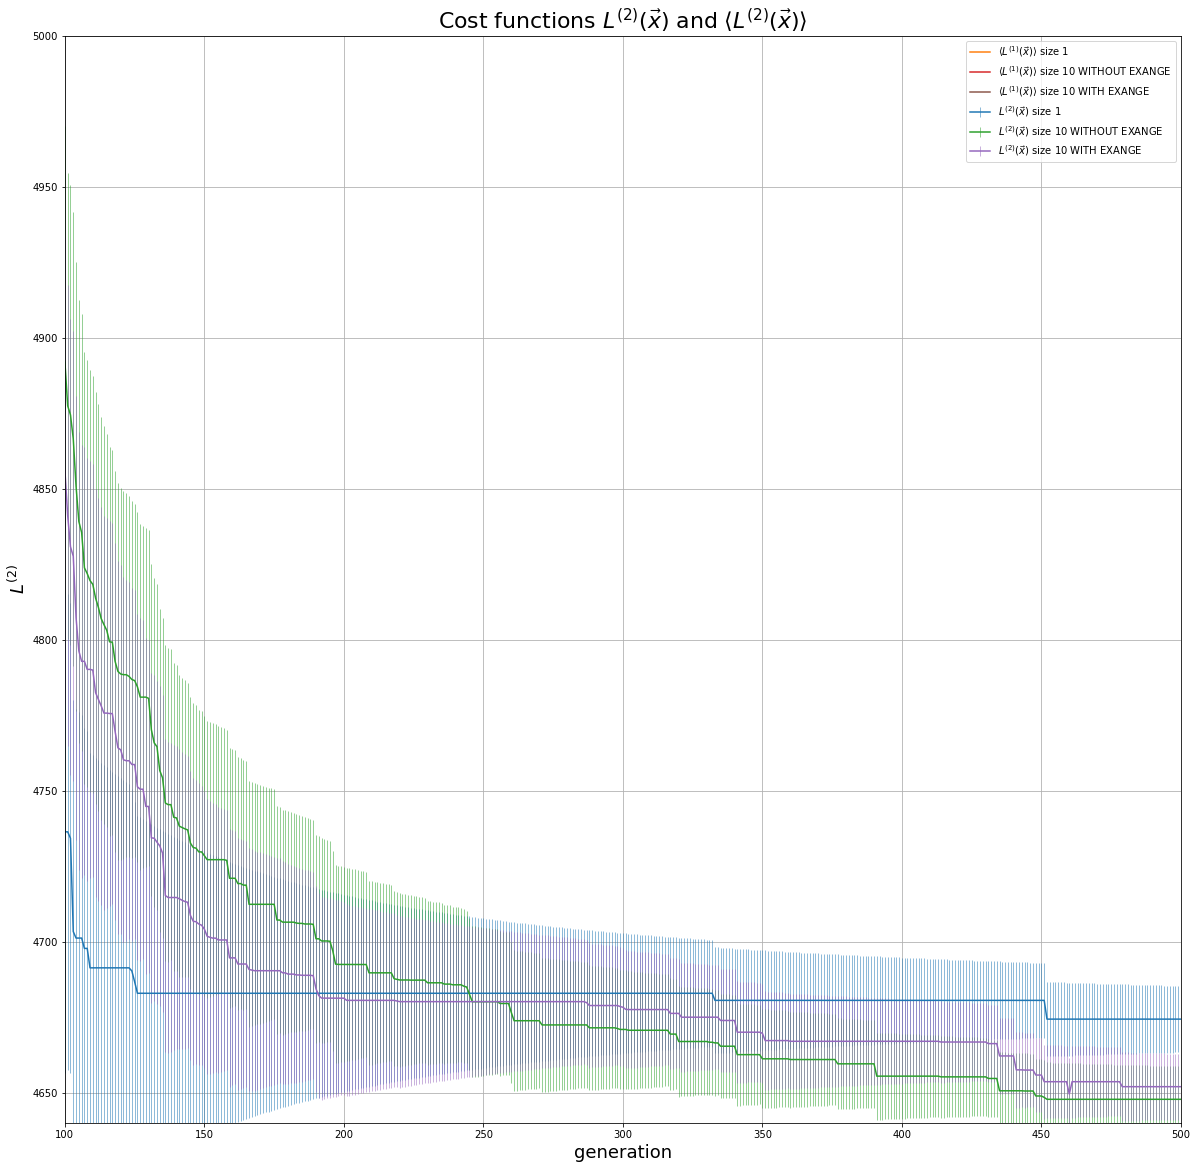

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#size1
plt.figure(figsize=(20, 20))
x, f = np.loadtxt("WOE/averege_best_L2_1.dat", usecols=(0,1), unpack='true',  delimiter='\t')
ax, af = np.loadtxt("WOE/averege_L2_1.dat", usecols=(0,1), unpack='true',  delimiter='\t')
error = np.loadtxt("WOE/error1.dat")
plt.errorbar(x,f, error, elinewidth=0.5, label= r"$L^{(2)}(\vec{x})$ size 1")
plt.plot(ax,af, label=r"$\langle L^{(1)}(\vec{x}) \rangle$ size 1")

#size10
x, f = np.loadtxt("WOE/averege_best_L2_10.dat", usecols=(0,1), unpack='true',  delimiter='\t')
ax, af = np.loadtxt("WOE/averege_L2_10.dat", usecols=(0,1), unpack='true',  delimiter='\t')
error = np.loadtxt("WOE/error10.dat")
plt.errorbar(x,f, error, elinewidth=0.5, label= r"$L^{(2)}(\vec{x})$ size 10 WITHOUT EXANGE")
plt.plot(ax,af, label=r"$\langle L^{(1)}(\vec{x}) \rangle$ size 10 WITHOUT EXANGE")
x, f = np.loadtxt("WE10/averege_best_L2_10.dat", usecols=(0,1), unpack='true',  delimiter='\t')
ax, af = np.loadtxt("WE10/averege_L2_10.dat", usecols=(0,1), unpack='true',  delimiter='\t')
error = np.loadtxt("WE10/error.dat")
plt.errorbar(x,f, error,elinewidth=0.5, label= r"$L^{(2)}(\vec{x})$ size 10 WITH EXANGE")
plt.plot(ax,af, label=r"$\langle L^{(1)}(\vec{x}) \rangle$ size 10 WITH EXANGE")
plt.xlabel('generation', fontsize=18)
plt.ylabel('$L^{(2)}$', fontsize=18)
plt.title(r"Cost functions $L^{(2)}(\vec{x})$ and $\langle L^{(2)}(\vec{x}) \rangle $", fontsize=22)
plt.legend(loc ="best")
plt.grid(True)
plt.show()

#size1
plt.figure(figsize=(20, 20))
x, f = np.loadtxt("WOE/averege_best_L2_1.dat", usecols=(0,1), unpack='true',  delimiter='\t')
ax, af = np.loadtxt("WOE/averege_L2_1.dat", usecols=(0,1), unpack='true',  delimiter='\t')
error = np.loadtxt("WOE/error1.dat")
plt.errorbar(x,f, error, elinewidth=0.5, label= r"$L^{(2)}(\vec{x})$ size 1")
plt.plot(ax,af, label=r"$\langle L^{(1)}(\vec{x}) \rangle$ size 1")

#size10
x, f = np.loadtxt("WOE/averege_best_L2_10.dat", usecols=(0,1), unpack='true',  delimiter='\t')
ax, af = np.loadtxt("WOE/averege_L2_10.dat", usecols=(0,1), unpack='true',  delimiter='\t')
error = np.loadtxt("WOE/error10.dat")
plt.errorbar(x,f, error, elinewidth=0.5, label= r"$L^{(2)}(\vec{x})$ size 10 WITHOUT EXANGE")
plt.plot(ax,af, label=r"$\langle L^{(1)}(\vec{x}) \rangle$ size 10 WITHOUT EXANGE")
x, f = np.loadtxt("WE10/averege_best_L2_10.dat", usecols=(0,1), unpack='true',  delimiter='\t')
ax, af = np.loadtxt("WE10/averege_L2_10.dat", usecols=(0,1), unpack='true',  delimiter='\t')
error = np.loadtxt("WE10/error.dat")
plt.errorbar(x,f, error, elinewidth=0.5, label= r"$L^{(2)}(\vec{x})$ size 10 WITH EXANGE")
plt.plot(ax,af, label=r"$\langle L^{(1)}(\vec{x}) \rangle$ size 10 WITH EXANGE")
plt.xlabel('generation', fontsize=18)
plt.ylabel('$L^{(2)}$', fontsize=18)
plt.title(r"Cost functions $L^{(2)}(\vec{x})$ and $\langle L^{(2)}(\vec{x}) \rangle $", fontsize=22)
plt.xlim(100,500)
plt.ylim(4640,5000)
plt.legend(loc ="best")
plt.grid(True)
plt.show()


Nei grafici precedenti è rappresentato l'andamento della funzione costo del migliore percorso e quella mediata su tutta la popolazione, entrambe mediate sui processi utilizzati, per ogni casistica studiata.

Come era possibile prevedere l'andamento medio di tutta la popolazione è pressoché identico in tutti e tre i casi, ovviamente è normale che nei 10 processi indipendenti le fluttuazioni siano maggiori visto che non vi è scambio di informazione. Anche nel caso di 10 processi con scambio di informazione la riduzione di variabilità della popolazione è minima rispetto ad un algoritmo elitario.

E' molto interessante notare come il miglior percorso ottenuto dal processo singolo sia ottenuto più rapidamente ma rimanga comunque peggiore rispetto alla media dei migliori ottenuta sia per 10 processi indipendenti che con scambio di informazione.

Per quanto riguarda invece le differenza tra le due simulazioni con 10 processi non vi sono differenze statistiche apprezzabili. Come è visibile nel grafico successivo il miglior percorso tra tutti i 10 processi indipendenti ha la stessa lunghezza di quello con i processi comunicanti, ad eccezione che quest'ultimo presenta questo percorso due volte al posto che una. (processo 4 negli indipendenti mentre processo 4 e processo 5 nei comunicanti).
Rimangono comunque non statisticamente significative queste differenze, segno del fatto che forse l'algoritmo necessiti di un numero maggiore di generazioni oppure di modifiche al tasso di mutazioni o crossover oppure semplicemente in entrambi i casi si è in prossimità di un minimo locale che risolve molto bene il nostro problema(anche se non vi può essere la certezza che questo sia un minimo assoluto).

Di seguito sono riportati i grafici dei migliori percorsi di ogni processo di ogni casistica

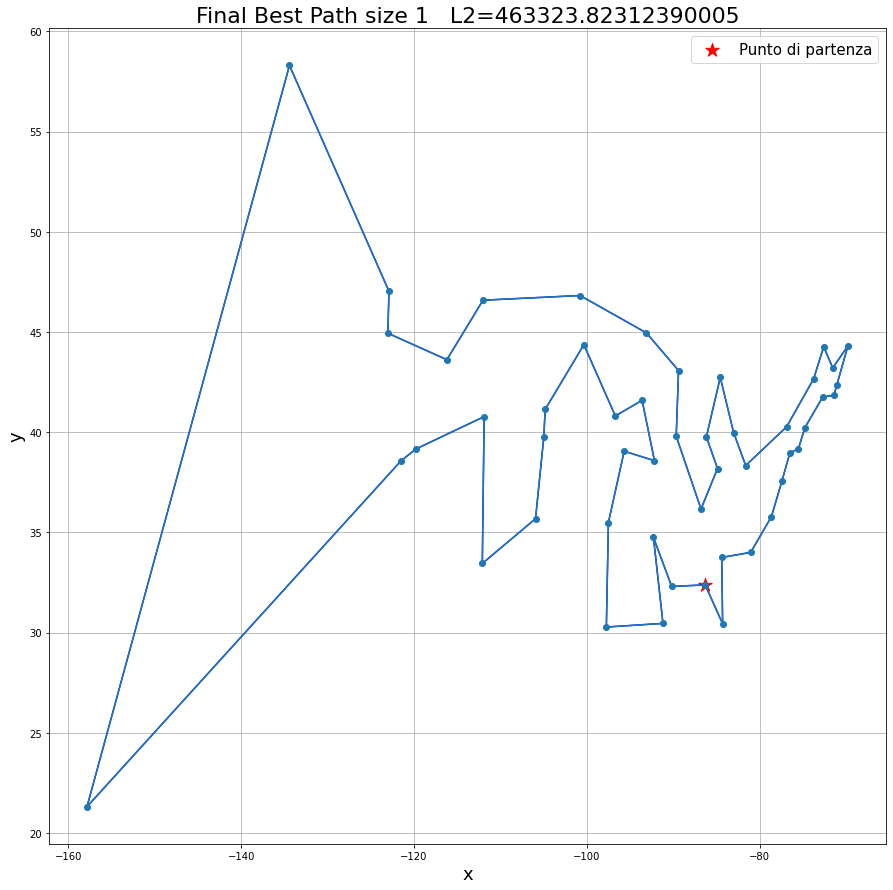

Text(0.5, 1.0, 'process 9\n463323.8231239002')

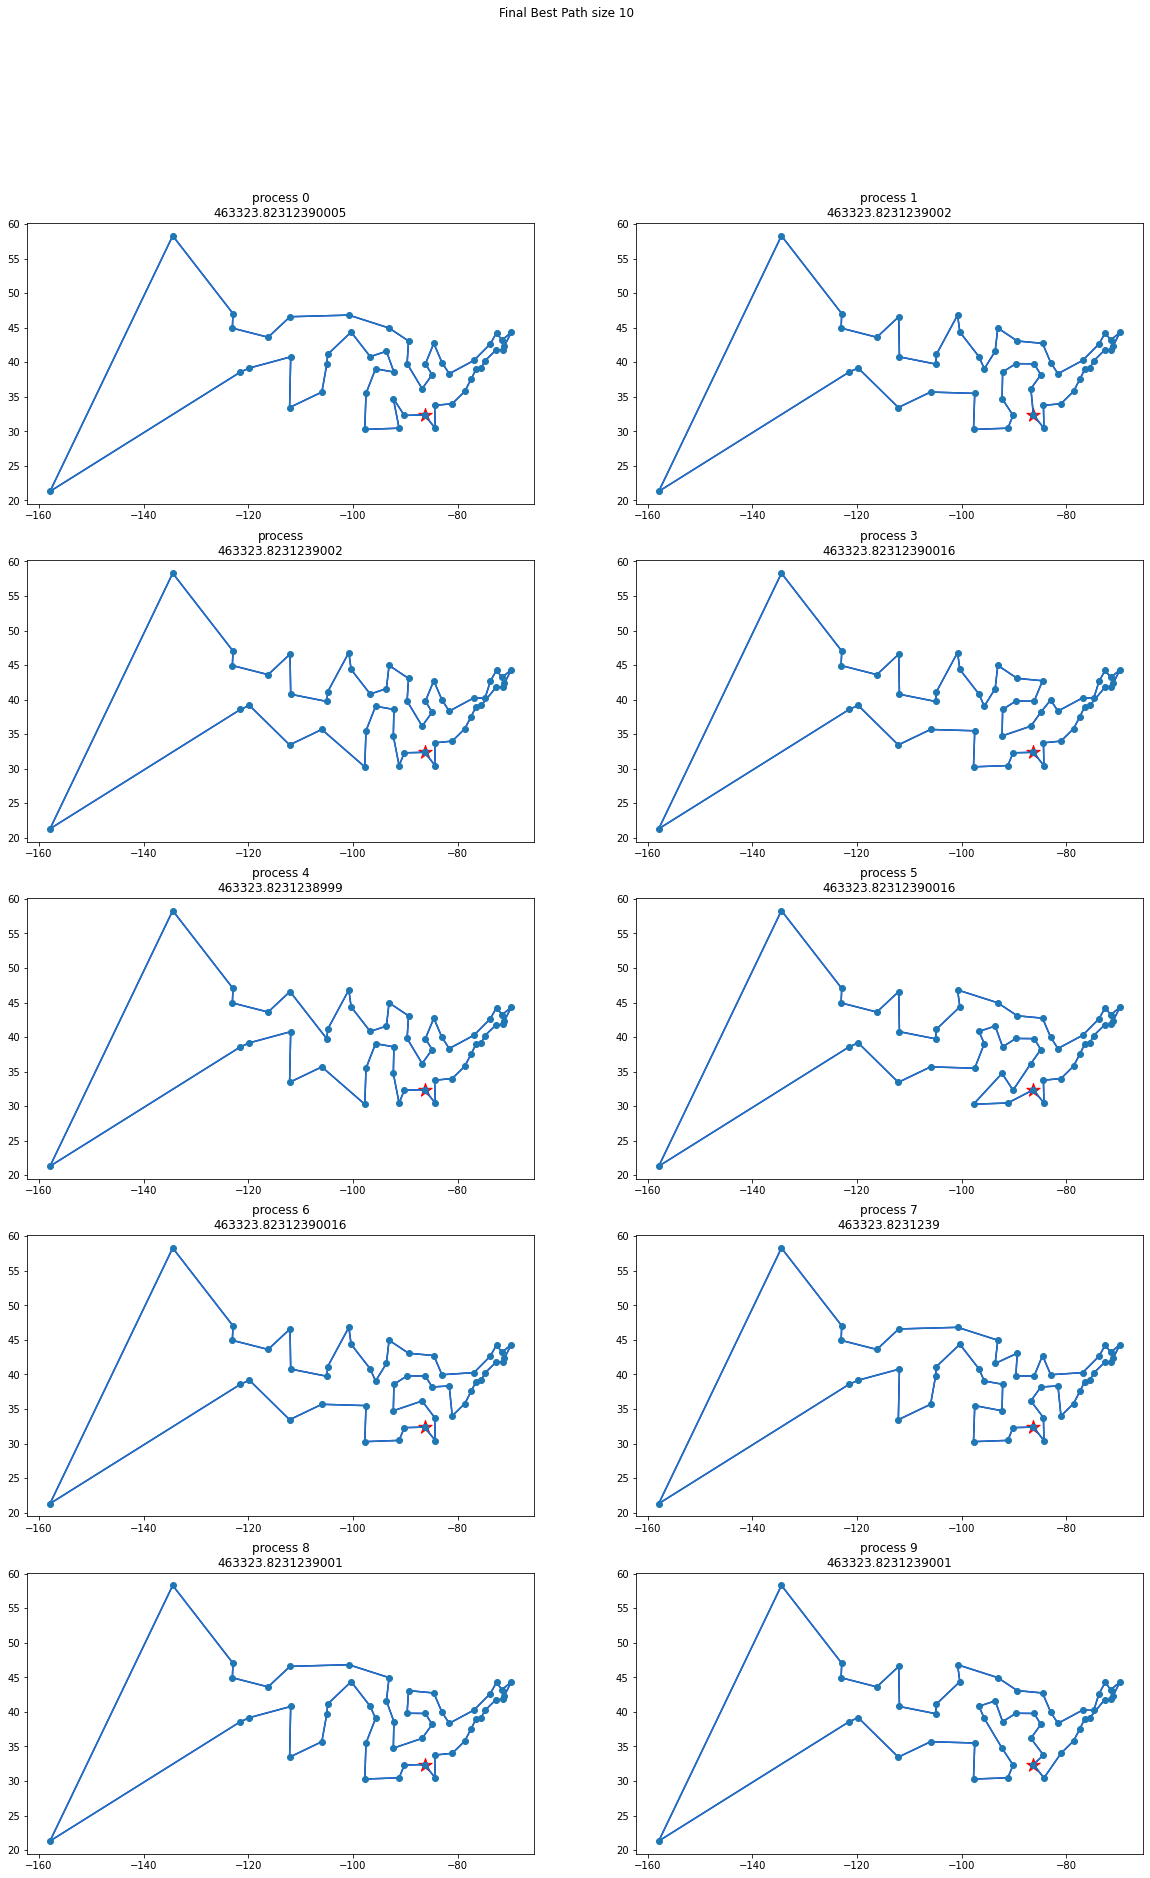

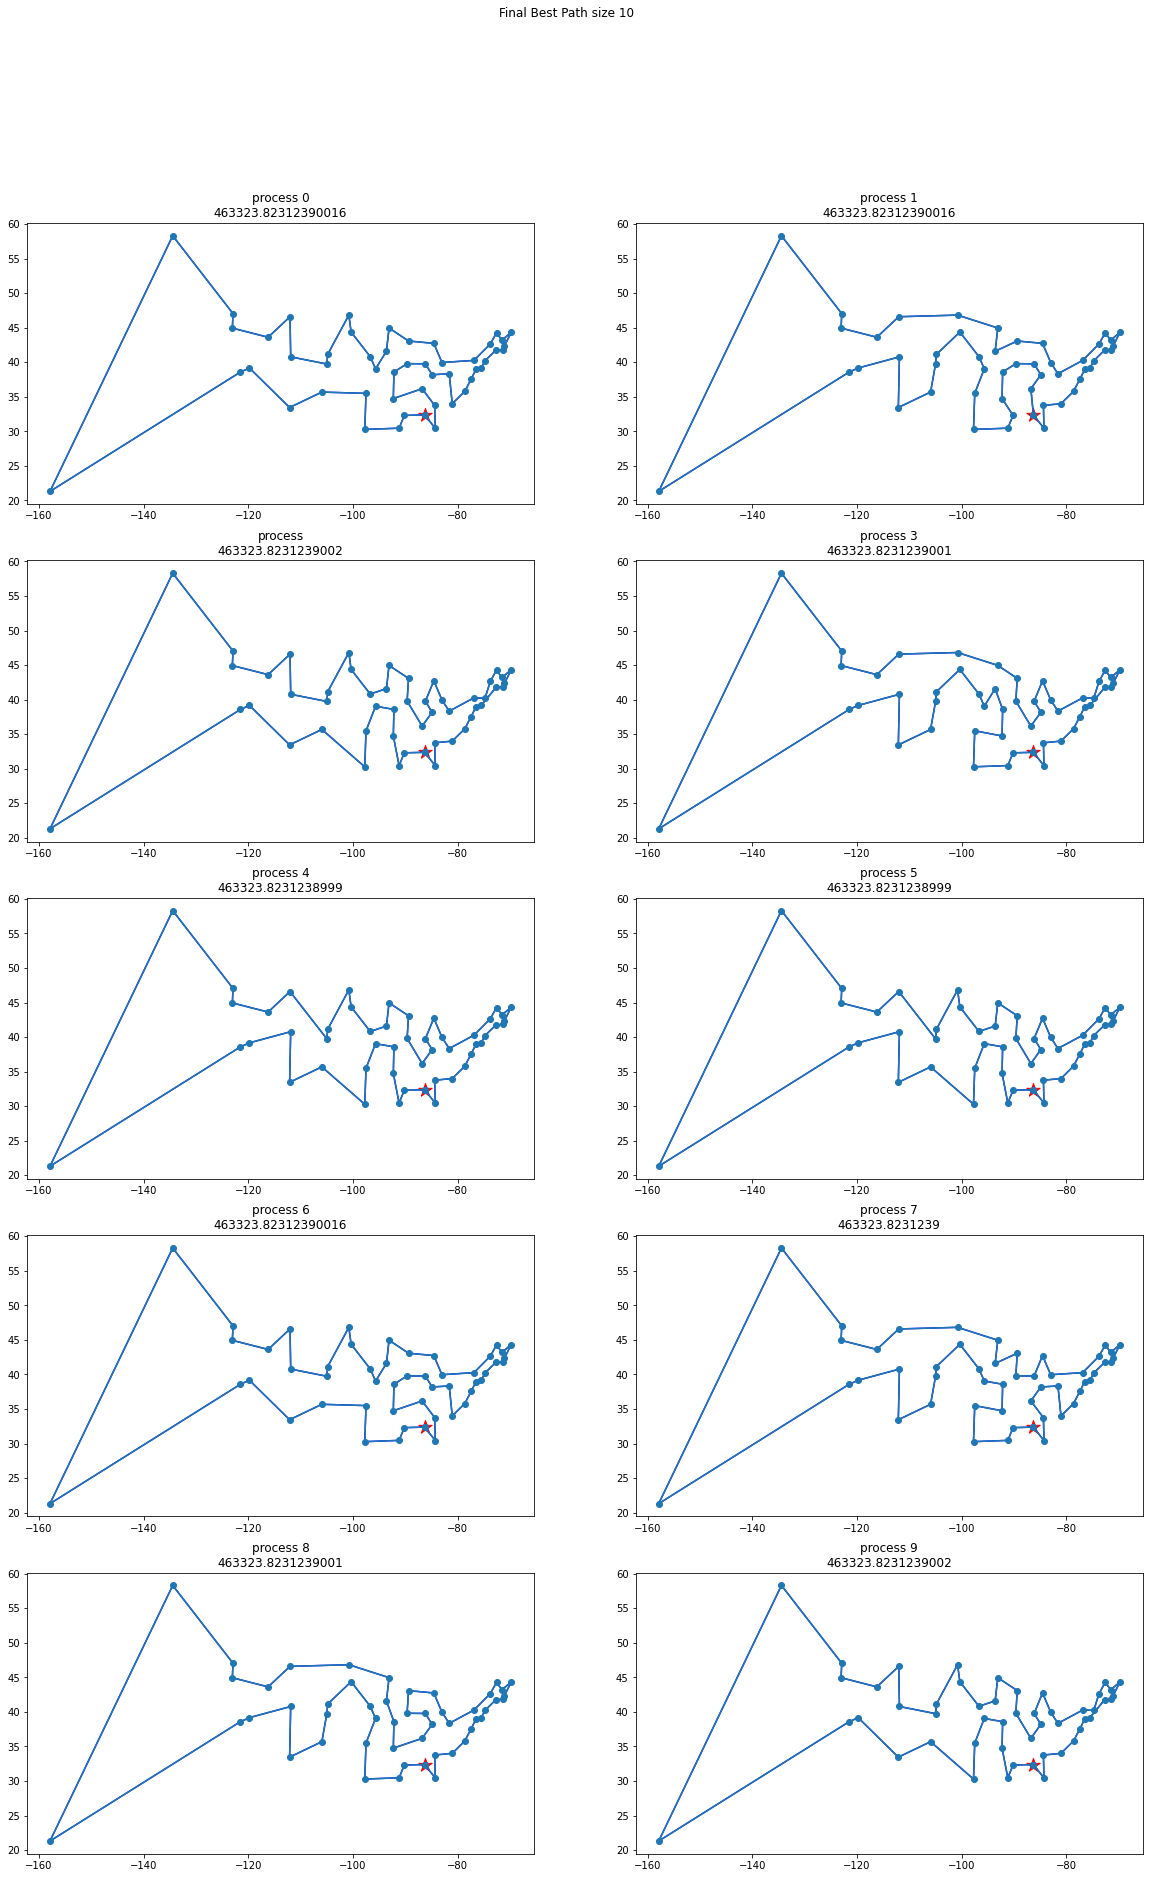

In [13]:
### WITHOUT EXANGE###

#size 1
plt.figure(figsize=(15, 15))
x, f = np.loadtxt("WOE/final_Path_1_0.dat", usecols=(1,2), unpack='true',  delimiter='\t')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1

plt.plot(x,f, 'b')
plt.plot(x,f, marker='o')
plt.scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
plt.title('Final Best Path size 1   L2='+str(L2), fontsize=22)
plt.legend(loc='best', fontsize=15)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(True)
plt.show()

#size 10
fig, axs = plt.subplots(5,2)
fig.set_figheight(30)
fig.set_figwidth(20)
fig.suptitle('Final Best Path size 10')
#fig.figure(figsize=(15, 15))

x, f = np.loadtxt("WOE/final_Path_10_0.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[0][0].plot(x,f, 'b')
axs[0][0].plot(x,f, marker='o')
axs[0][0].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[0][0].set_title('process 0'+'\n'+str(L2))

x, f = np.loadtxt("WOE/final_Path_10_1.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[0][1].plot(x,f, 'b')
axs[0][1].plot(x,f, marker='o')
axs[0][1].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[0][1].set_title('process 1'+'\n'+str(L2))

x, f = np.loadtxt("WOE/final_Path_10_2.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[1][0].plot(x,f, 'b')
axs[1][0].plot(x,f, marker='o')
axs[1][0].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[1][0].set_title('process'+'\n'+str(L2))

x, f = np.loadtxt("WOE/final_Path_10_3.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[1][1].plot(x,f, 'b')
axs[1][1].plot(x,f, marker='o')
axs[1][1].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[1][1].set_title('process 3'+'\n'+str(L2))

x, f = np.loadtxt("WOE/final_Path_10_4.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[2][0].plot(x,f, 'b')
axs[2][0].plot(x,f, marker='o')
axs[2][0].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[2][0].set_title('process 4'+'\n'+str(L2))

x, f = np.loadtxt("WOE/final_Path_10_5.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[2][1].plot(x,f, 'b')
axs[2][1].plot(x,f, marker='o')
axs[2][1].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[2][1].set_title('process 5'+'\n'+str(L2))

x, f = np.loadtxt("WOE/final_Path_10_6.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[3][0].plot(x,f, 'b')
axs[3][0].plot(x,f, marker='o')
axs[3][0].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[3][0].set_title('process 6'+'\n'+str(L2))

x, f = np.loadtxt("WOE/final_Path_10_7.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[3][1].plot(x,f, 'b')
axs[3][1].plot(x,f, marker='o')
axs[3][1].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[3][1].set_title('process 7'+'\n'+str(L2))

x, f = np.loadtxt("WOE/final_Path_10_8.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[4][0].plot(x,f, 'b')
axs[4][0].plot(x,f, marker='o')
axs[4][0].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[4][0].set_title('process 8'+'\n'+str(L2))

x, f = np.loadtxt("WOE/final_Path_10_9.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[4][1].plot(x,f, 'b')
axs[4][1].plot(x,f, marker='o')
axs[4][1].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[4][1].set_title('process 9'+'\n'+str(L2))

#############################################################################################################

### WITH EXANGE###
#size 10
fig, axs = plt.subplots(5,2)
fig.set_figheight(30)
fig.set_figwidth(20)
fig.suptitle('Final Best Path size 10')
#fig.figure(figsize=(15, 15))

x, f = np.loadtxt("WE10/final_Path_10_0.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[0][0].plot(x,f, 'b')
axs[0][0].plot(x,f, marker='o')
axs[0][0].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[0][0].set_title('process 0'+'\n'+str(L2))

x, f = np.loadtxt("WE10/final_Path_10_1.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[0][1].plot(x,f, 'b')
axs[0][1].plot(x,f, marker='o')
axs[0][1].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[0][1].set_title('process 1'+'\n'+str(L2))

x, f = np.loadtxt("WE10/final_Path_10_2.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[1][0].plot(x,f, 'b')
axs[1][0].plot(x,f, marker='o')
axs[1][0].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[1][0].set_title('process'+'\n'+str(L2))

x, f = np.loadtxt("WE10/final_Path_10_3.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[1][1].plot(x,f, 'b')
axs[1][1].plot(x,f, marker='o')
axs[1][1].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[1][1].set_title('process 3'+'\n'+str(L2))

x, f = np.loadtxt("WE10/final_Path_10_4.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[2][0].plot(x,f, 'b')
axs[2][0].plot(x,f, marker='o')
axs[2][0].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[2][0].set_title('process 4'+'\n'+str(L2))

x, f = np.loadtxt("WE10/final_Path_10_5.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[2][1].plot(x,f, 'b')
axs[2][1].plot(x,f, marker='o')
axs[2][1].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[2][1].set_title('process 5'+'\n'+str(L2))

x, f = np.loadtxt("WE10/final_Path_10_6.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[3][0].plot(x,f, 'b')
axs[3][0].plot(x,f, marker='o')
axs[3][0].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[3][0].set_title('process 6'+'\n'+str(L2))

x, f = np.loadtxt("WE10/final_Path_10_7.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[3][1].plot(x,f, 'b')
axs[3][1].plot(x,f, marker='o')
axs[3][1].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[3][1].set_title('process 7'+'\n'+str(L2))

x, f = np.loadtxt("WE10/final_Path_10_8.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[4][0].plot(x,f, 'b')
axs[4][0].plot(x,f, marker='o')
axs[4][0].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[4][0].set_title('process 8'+'\n'+str(L2))

x, f = np.loadtxt("WE10/final_Path_10_9.dat", usecols=(1,2), unpack='true',  delimiter='\t')
axs[4][1].plot(x,f, 'b')
axs[4][1].plot(x,f, marker='o')
axs[4][1].scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
L2=0.0
i=0
for city in x:
    L2=L2+city**2+f[i]
    i=i+1
axs[4][1].set_title('process 9'+'\n'+str(L2))